In [1]:
import sys
# adding notebooks to the system path
sys.path.insert(0, '/home/southark/notebooks')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
from tqdm import tqdm

matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%autoreload 2
%matplotlib inline

import scipy.stats as stats

from perturbseq import *

In [2]:
from hits.visualize import interactive

Loading BokehJS ...

In [3]:
pops = dict()

pops['fibro'] = CellPopulation.from_hdf('/data/norman/southark/tfs_standardized/20240311_fibroblast_CRISPRa_mean_pop.hdf', stored_matrix_ids=['p', 'adj_p', 'masked'])
pops['rpe1'] = CellPopulation.from_hdf('/data/norman/southark/tfs_standardized/20240309_RPE1_CRISPRa_mean_pop.hdf', stored_matrix_ids=['p', 'adj_p', 'masked'])

Loading matrix...
Available keys: ['/cell_list', '/gene_list', '/matrix', '/normalized_matrix_adj_p', '/normalized_matrix_masked', '/normalized_matrix_p']
Loading metadata...
Done in 6.2301366329193115s.
Done.
Loading matrix...
Available keys: ['/cell_list', '/gene_list', '/matrix', '/normalized_matrix_adj_p', '/normalized_matrix_masked', '/normalized_matrix_p']
Loading metadata...
Done in 8.201767921447754s.
Done.


In [4]:
pops['fibro'].genes.index.name = 'gene_id'
pops['rpe1'].genes.index.name = 'gene_id'

In [5]:
expanded_guides_fibro = pd.read_csv('/data/norman/southark/tfs_standardized/20240319_rescued_fibroblast_guides.csv', index_col=0)
pops['fibro'].cells['expanded_masked_active'] = expanded_guides_fibro['expanded_masked_active']

expanded_guides_rpe1 = pd.read_csv('/data/norman/southark/tfs_standardized/20240319_rescued_rpe1_guides.csv', index_col=0)
pops['rpe1'].cells['expanded_masked_active'] = expanded_guides_rpe1['expanded_masked_active']

#del expanded_guides

In [6]:
expanded_guides_rpe1['expanded_masked_active'].sum()

84

In [7]:
guide_library = pd.read_csv('/data/norman/southark/tfs_standardized/20240422_merged_morf_tf_lib_guide_activity_classifications_RPE1_final_low_UMI_count_regressions_coef.csv', index_col=0)

In [8]:
len(guide_library.index)

10708

In [9]:
guide_library['fibro_de_genes'] = pops['fibro'].cells['de_genes']
guide_library['rpe1_de_genes'] = pops['rpe1'].cells['de_genes']

In [10]:
guide_library['masked_active_fibro'] = pops['fibro'].cells['masked_active']
guide_library['masked_active_rpe1'] = pops['rpe1'].cells['masked_active']


guide_library['expanded_masked_active_fibro'] = expanded_guides_fibro['expanded_masked_active']
guide_library['expanded_masked_active_rpe1'] = expanded_guides_rpe1['expanded_masked_active']

In [11]:
guide_library['masked_active_fibro'].sum()

659

In [12]:
guide_library['masked_active_rpe1'].sum()

537

In [13]:
guide_library['expanded_masked_active_rpe1'].sum()

84

In [14]:
guide_library['expanded_masked_active_fibro'].sum()

106

In [15]:
guide_library['expanded_masked_active_fibro'].fillna(False, inplace=True)
guide_library['expanded_masked_active_rpe1'].fillna(False, inplace=True)

/tmp/ipykernel_15061/2386817121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guide_library['expanded_masked_active_fibro'].fillna(False, inplace=True)
/tmp/ipykernel_15061/2386817121.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  guide_library['expanded_masked_active_fibro'].fillna(False, inplace=Tr

In [16]:
guide_library['masked_active_fibro'].fillna(False, inplace=True)
guide_library['masked_active_rpe1'].fillna(False, inplace=True)

/tmp/ipykernel_15061/1399527308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guide_library['masked_active_fibro'].fillna(False, inplace=True)
/tmp/ipykernel_15061/1399527308.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  guide_library['masked_active_fibro'].fillna(False, inplace=True)
/tmp/ipykernel

In [17]:
fibro_genes = guide_library.query('masked_active_fibro or expanded_masked_active_fibro')['target_gene'].unique()

In [18]:
rpe1_genes = guide_library.query('masked_active_rpe1 or expanded_masked_active_rpe1')['target_gene'].unique()

In [40]:
all_tf_genes = guide_library['target_gene'].unique()

In [41]:
annotations = pd.read_excel('The Human Transcription factors annotation.xlsx', index_col=0)

In [42]:
annotations

,Ensembl ID,HGNC symbol,DBD,Is TF?,TF assessment,Binding mode,Motif status,Final Notes,Final Comments,Interpro ID(s),...,CisBP considers it a TF?,TFCat classification,Is a GO TF?,Initial assessment,Curator 1,Curator 2,TFclass considers it a TF?,Go Evidence,Pfam Domains (By ENSP ID),Is C2H2 ZF(KRAB)?
0,ENSG00000137203,TFAP2A,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,NaN,NaN,IPR008121;IPR013854,...,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,"1a1, Direct HQ evidence",Sam Lambert,Yimeng Yin,Yes,$#ENSG00000137203#GO:0000981#sequence-specific...,$#ENSP00000368928#ENSG00000137203#ENST00000379...,False
1,ENSG00000008196,TFAP2B,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,NaN,NaN,IPR008122;IPR013854,...,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,"1a1, Direct HQ evidence",Matt Weirauch,Yimeng Yin,Yes,$#ENSG00000008196#GO:0000981#sequence-specific...,$#ENSP00000377265#ENSG00000008196#ENST00000393...,False
2,ENSG00000087510,TFAP2C,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,NaN,NaN,IPR008123;IPR013854,...,Yes,No,Yes,"1a1, Direct HQ evidence",Matt Weirauch,Yimeng Yin,Yes,$#ENSG00000087510#GO:0001077#RNA polymerase II...,$#ENSP00000201031#ENSG00000087510#ENST00000201...,False
3,ENSG00000008197,TFAP2D,AP-2,Yes,Known motif,Monomer or homomultimer,In vivo/Misc source,Only known motifs are from Transfac or HocoMoc...,Binds the same GCCTGAGGC sequence as the other...,IPR013854;,...,Yes,No,Yes,"2a1, Lower confidence direct evidence",Arttu Jolma,Sam Lambert,Yes,$#ENSG00000008197#GO:0000981#sequence-specific...,$#ENSP00000008391#ENSG00000008197#ENST00000008...,False
4,ENSG00000116819,TFAP2E,AP-2,Yes,Known motif,Monomer or homomultimer,High-throughput in vitro,NaN,NaN,IPR013854;,...,Yes,TF Gene_DNA-Binding: sequence-specific_DNA Bin...,Yes,"1a1, Direct HQ evidence",Sam Lambert,Laura Campitelli,Yes,$#ENSG00000116819#GO:0000981#sequence-specific...,$#ENSP00000362332#ENSG00000116819#ENST00000373...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,ENSG00000172687,ZNF738,Unknown,No,Unlikely to be sequence specific TF,Not a DNA binding protein,No motif,NaN,Contains a KRAB domain (associated with many C...,IPR001909;,...,No,No,No,"5a, one of the source datasets predicts is as ...",Jussi Taipale,Sam Lambert,No,NaN,$#ENSP00000311957#ENSG00000172687#ENST00000311...,False
2761,ENSG00000106479,ZNF862,Unknown,No,Unlikely to be sequence specific TF,Not a DNA binding protein,No motif,Has a putative AT-hook,Contains a KRAB domain (associated with many C...,NaN,...,No,No,No,New proteins added after initial stage,Arttu Jolma,Sam Lambert,No,NaN,NaN,False
2762,ENSG00000124201,ZNFX1,Unknown,No,Unlikely to be sequence specific TF,Not a DNA binding protein,No motif,NaN,Probably an RBP (PMID: 22658674; PMID: 22681889),IPR000967;IPR016024;IPR027417;,...,No,No,No,"5a, one of the source datasets predicts is as ...",Arttu Jolma,Matt Weirauch,Yes,$#ENSG00000124201#GO:0003700#sequence-specific...,$#ENSP00000360819#ENSG00000124201#ENST00000371...,False
2763,ENSG00000132485,ZRANB2,Unknown,No,ssDNA/RNA binding,Not a DNA binding protein,No motif,NaN,Its the wrong kind of zinc finger to bind DNA....,IPR001876;IPR017337,...,No,No,Yes,"5a, one of the source datasets predicts is as ...",Tim Hughes,Matt Weirauch,No,$#ENSG00000132485#GO:0003700#sequence-specific...,$#ENSP00000254821#ENSG00000132485#ENST00000254...,False


In [43]:
guide_library['DBD'] = guide_library['gene_name'].map(annotations.set_index('Ensembl ID')['DBD'])
guide_library['DBD'].fillna('Unknown', inplace=True)

/tmp/ipykernel_15061/1893015758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guide_library['DBD'].fillna('Unknown', inplace=True)


In [44]:
DBD_annotations = guide_library.groupby('target_gene')['DBD'].first()

In [45]:
expressed_fibro_genes = guide_library.groupby('target_gene')['expressed_fibro'].first()
expressed_rpe1_genes = guide_library.groupby('target_gene')['expressed_rpe1'].first()

In [46]:
dmv_tfs = [
    'FOXA1', 'FOXA2', 'FOXB1', 'FOXC1', 'FOXC2', 'FOXD2', 'FOXD4', 'FOXF1', 
    'FOXF2', 'FOXF3', 'FOXF4', 'FOXG1', 'FOXH1', 'FOXL1', 'FOXL2', 'FOXO1', 
    'FOXP1', 'FOXP2', 'FOXP3', 'FOXP4', 'FOXR1', 'FOXR2', 'FOXR3', 
    'GATA2', 'GATA3', 'GATA4', 'GATA6', 'HAND1', 'HAND2', 'GLI3', 
    'GSC', 'HOXA1', 'HOXA2', 'HOXA3', 'HOXA5', 'HOXA6', 'HOXA7', 
    'HOXA9', 'HOXA11', 'HOXA13', 'HOXB1', 'HOXB2', 'HOXB3', 'HOXB4', 
    'HOXB5', 'HOXB6', 'HOXB7', 'HOXB8', 'HOXB9', 'HOXC4', 'HOXC5', 
    'HOXC6', 'HOXC8', 'HOXC9', 'HOXD1', 'HOXD3', 'HOXD4', 'HOXD8', 
    'HOXD9', 'HOXD10', 'HOXD11', 'HOXD12', 'HOXD13', 'IRX1', 'IRX2', 
    'IRX3', 'IRX4', 'IRX5', 'ISL1', 'ISL2', 'KLF4', 'KLF5', 'KLF6', 
    'KLF7', 'KLF10', 'KLF13', 'KLF16', 'LHX1', 'LHX2', 'LHX3', 'LHX5', 
    'LHX6', 'LHX7', 'LHX8', 'LHX9', 'NKX2-1', 'NKX2-2', 'NKX2-3', 
    'NKX2-5', 'NKX6-1', 'NKX6-2', 'NEUROG1', 'NEUROG2', 'NEUROG3', 
    'ONECUT1', 'ONECUT2', 'ONECUT3', 'OTX1', 'OTX2', 'PAX3', 'PAX6', 
    'PAX9', 'POU2F1', 'POU3F1', 'POU3F2', 'POU3F3', 'POU4F1', 
    'POU4F2', 'POU4F3', 'POU5F1', 'PRDM8', 'PRDM12', 'PRDM13', 
    'RUNX1', 'RUNX3', 'SALL1', 'SALL3', 'SATB1', 'SATB2', 'SIX1', 
    'SIX2', 'SIX3', 'SIX6', 'SOX1', 'SOX2', 'SOX3', 'SOX4', 'SOX5', 
    'SOX6', 'SOX7', 'SOX9', 'SOX10', 'SOX11', 'SOX14', 'SOX17', 
    'SOX21', 'T', 'TBX15', 'TBX18', 'ZIC1', 'ZIC2', 'ZIC3', 'ZIC4', 
    'ZIC5'
]

In [47]:
guide_library['is_DMV'] = guide_library['target_gene'].isin(dmv_tfs)

In [48]:
krab_zfps = gene_list = [
    "ZNF2", "ZNF100", "ZNF200", "ZNF300", "ZNF404", "ZNF500", "ZNF600", "ZNF700", "ZNF805", "ZFP1", "AC010642.1",
    "ZNF3", "ZNF101", "ZNF202", "ZNF302", "ZNF415", "ZNF506", "ZNF605", "ZNF701", "ZNF808", "ZFP2", "AC073343.1",
    "ZNF7", "ZNF107", "ZNF205", "ZNF304", "ZNF416", "ZNF510", "ZNF606", "ZNF705A", "ZNF812", "ZFP14", "CTD-2192J16.20",
    "ZNF8", "ZNF112", "ZNF208", "ZNF311", "ZNF417", "ZNF514", "ZNF607", "ZNF705B", "ZNF813", "ZFP28", "HKR1",
    "ZNF10", "ZNF114", "ZNF211", "ZNF317", "ZNF418", "ZNF517", "ZNF610", "ZNF705G", "ZNF814", "ZFP30", "KRBOX4",
    "ZNF12", "ZNF117", "ZNF212", "ZNF320", "ZNF419", "ZNF519", "ZNF611", "ZNF707", "ZNF816", "ZFP37", "PRDM9",
    "ZNF14", "ZNF121", "ZNF213", "ZNF324", "ZNF420", "ZNF525", "ZNF613", "ZNF708", "ZNF823", "ZFP57", "RBAK",
    "ZNF16", "ZNF124", "ZNF214", "ZNF324B", "ZNF425", "ZNF527", "ZNF614", "ZNF709", "ZNF829", "ZFP69", "RP11-1396O13.13",
    "ZNF17", "ZNF132", "ZNF215", "ZNF331", "ZNF426", "ZNF528", "ZNF615", "ZNF713", "ZNF836", "ZFP69B", "ZIK1",
    "ZNF18", "ZNF133", "ZNF221", "ZNF333", "ZNF429", "ZNF529", "ZNF616", "ZNF714", "ZNF837", "ZFP82", "ZIM2",
    "ZNF19", "ZNF134", "ZNF222", "ZNF334", "ZNF430", "ZNF530", "ZNF619", "ZNF716", "ZNF841", "ZFP90", "ZIM3",
    "ZNF20", "ZNF135", "ZNF223", "ZNF337", "ZNF431", "ZNF534", "ZNF620", "ZNF717", "ZNF844", "ZFP92", "ZKSCAN1",
    "ZNF23", "ZNF136", "ZNF224", "ZNF343", "ZNF432", "ZNF540", "ZNF621", "ZNF720", "ZNF845", "ZKSCAN2",
    "ZNF25", "ZNF138", "ZNF225", "ZNF345", "ZNF433", "ZNF543", "ZNF624", "ZNF721", "ZNF846", "ZKSCAN3",
    "ZNF26", "ZNF140", "ZNF226", "ZNF347", "ZNF436", "ZNF544", "ZNF625", "ZNF724P", "ZNF850", "ZKSCAN4",
    "ZNF28", "ZNF141", "ZNF227", "ZNF350", "ZNF439", "ZNF546", "ZNF625-ZNF20", "ZNF726", "ZNF852", "ZKSCAN5",
    "ZNF30", "ZNF154", "ZNF229", "ZNF354A", "ZNF440", "ZNF547", "ZNF626", "ZNF727", "ZNF860", "ZKSCAN7",
    "ZNF33A", "ZNF155", "ZNF230", "ZNF354B", "ZNF441", "ZNF548", "ZNF627", "ZNF728", "ZNF878", "ZKSCAN8",
    "ZNF33B", "ZNF157", "ZNF233", "ZNF354C", "ZNF442", "ZNF549", "ZNF630", "ZNF729", "ZNF879", "ZSCAN4",
    "ZNF34", "ZNF160", "ZNF234", "ZNF382", "ZNF443", "ZNF550", "ZNF641", "ZNF730", "ZNF880", "ZSCAN16",
    "ZNF35", "ZNF169", "ZNF235", "ZNF383", "ZNF445", "ZNF551", "ZNF649", "ZNF732", "ZNF891", "ZSCAN18",
    "ZNF37A", "ZNF175", "ZNF239", "ZNF394", "ZNF446", "ZNF552", "ZNF655", "ZNF736", "ZSCAN21",
    "ZNF41", "ZNF177", "ZNF248", "ZNF398", "ZNF454", "ZNF554", "ZNF660", "ZNF737", "ZSCAN22",
    "ZNF43", "ZNF180", "ZNF250", "ZNF460", "ZNF555", "ZNF662", "ZNF746", "ZSCAN25",
    "ZNF44", "ZNF181", "ZNF251", "ZNF461", "ZNF556", "ZNF665", "ZNF747", "ZSCAN29",
    "ZNF45", "ZNF182", "ZNF253", "ZNF468", "ZNF557", "ZNF667", "ZNF749", "ZSCAN32",
    "ZNF57", "ZNF184", "ZNF254", "ZNF470", "ZNF558", "ZNF669", "ZNF763",
    "ZNF66", "ZNF189", "ZNF256", "ZNF471", "ZNF559", "ZNF670", "ZNF764",
    "ZNF69", "ZNF195", "ZNF257", "ZNF473", "ZNF560", "ZNF671", "ZNF765",
    "ZNF71", "ZNF197", "ZNF260", "ZNF479", "ZNF561", "ZNF674", "ZNF766",
    "ZNF74", "ZNF263", "ZNF480", "ZNF562", "ZNF675", "ZNF768",
    "ZNF75A", "ZNF264", "ZNF483", "ZNF563", "ZNF676", "ZNF772",
    "ZNF75D", "ZNF266", "ZNF484", "ZNF564", "ZNF677", "ZNF773",
    "ZNF77", "ZNF267", "ZNF485", "ZNF565", "ZNF678", "ZNF776",
    "ZNF79", "ZNF268", "ZNF486", "ZNF566", "ZNF679", "ZNF777",
    "ZNF80", "ZNF273", "ZNF487", "ZNF567", "ZNF680", "ZNF778",
    "ZNF81", "ZNF274", "ZNF490", "ZNF568", "ZNF681", "ZNF780A",
    "ZNF83", "ZNF275", "ZNF491", "ZNF569", "ZNF682", "ZNF780B",
    "ZNF84", "ZNF282", "ZNF492", "ZNF570", "ZNF684", "ZNF781",
    "ZNF85", "ZNF283", "ZNF493", "ZNF571", "ZNF688", "ZNF782",
    "ZNF90", "ZNF284", "ZNF496", "ZNF573", "ZNF689", "ZNF783",
    "ZNF91", "ZNF285", "ZNF497", "ZNF577", "ZNF695", "ZNF785",
    "ZNF92", "ZNF286A", "ZNF578", "ZNF699", "ZNF786",
    "ZNF93", "ZNF286B", "ZNF582", "ZNF788",
    "ZNF98", "ZNF287", "ZNF583", "ZNF789",
    "ZNF99", "ZNF584", "ZNF790",
    "ZNF585A", "ZNF791",
    "ZNF585B", "ZNF792",
    "ZNF586", "ZNF793",
    "ZNF587", "ZNF799",
    "ZNF587B",
    "ZNF589",
    "ZNF596",
    "ZNF597",
    "ZNF599"
]

In [49]:
guide_library['is_KZFP'] = guide_library['target_gene'].isin(krab_zfps)

In [50]:
guide_library['KRAB_DBD'] = guide_library.apply(lambda x: 'KRAB ZF' if x['is_KZFP'] else x['DBD'], axis=1)

In [51]:
KRAB_DBD_annotations = guide_library.groupby('target_gene')['KRAB_DBD'].first()

In [52]:
guide_library.to_csv('/home/southark/notebooks/rpe1_crispri_tfs/CRISPRa_fig_notebooks/guide_library_with_DBD_annotations.csv')

In [53]:
activated_fibro = guide_library[guide_library['is_activated_fibro'].fillna(False)]['target_gene'].unique()
activated_rpe1 = guide_library[guide_library['is_activated_rpe1'].fillna(False)]['target_gene'].unique()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

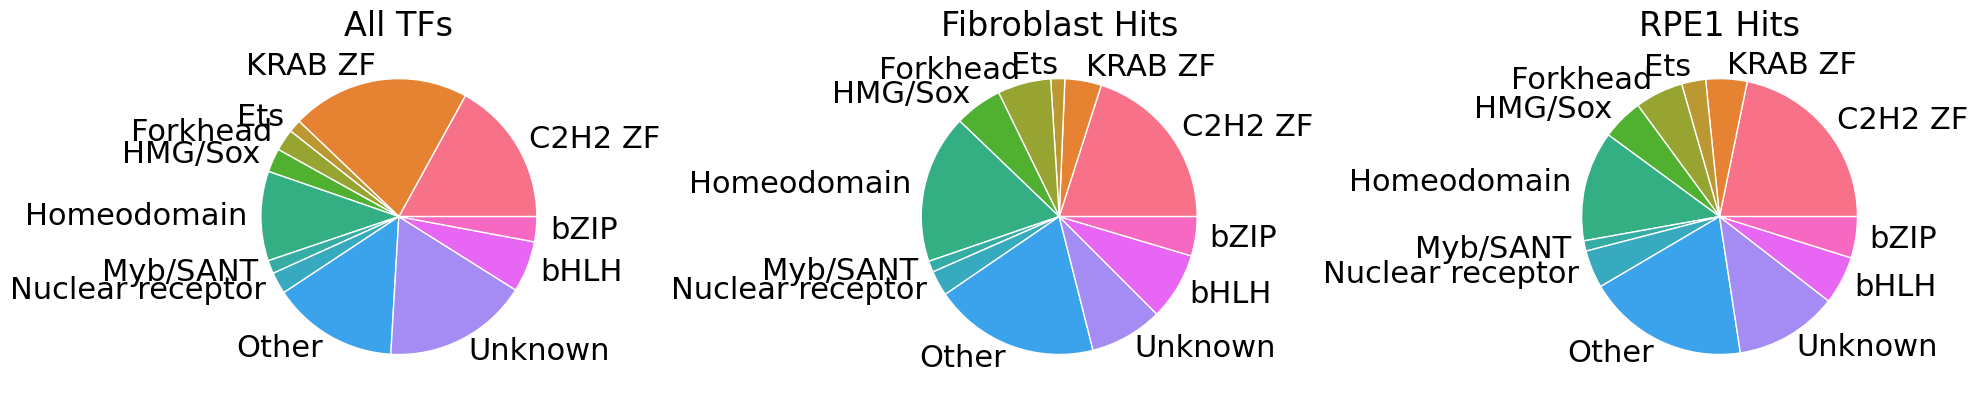

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context('poster')

def consolidate_small_categories(series, threshold=20):
    total_counts = series.value_counts()
    small_cats = total_counts[total_counts <= threshold].index
    series_mod = series.copy()
    series_mod[series_mod.isin(small_cats)] = 'Other'
    return series_mod

# Consolidate small categories
consolidated_dbd = consolidate_small_categories(KRAB_DBD_annotations)

def get_domain_colors_and_order(dbd_annotations, genes_list):
    # Get all unique domains across all datasets
    all_domains = set()
    for genes in genes_list:
        all_domains.update(dbd_annotations[genes].unique())
    
    # Create custom order with KRAB ZF and C2H2 ZF together
    ordered_domains = []
    zf_domains = []
    other_domains = []
    
    for domain in sorted(all_domains):
        if 'ZF' in domain:
            zf_domains.append(domain)
        else:
            other_domains.append(domain)
    
    # Combine in desired order
    ordered_domains = zf_domains + other_domains
    
    # Create color dictionary
    colors = sns.color_palette('husl', n_colors=len(ordered_domains))
    domain_colors = dict(zip(ordered_domains, colors))
    
    return domain_colors

def plot_dbd_pie(genes, dbd_annotations, domain_colors, ax, title):
    counts = dbd_annotations[genes].value_counts()
    
    # Reorder data to match color dictionary
    ordered_counts = pd.Series(index=domain_colors.keys(), data=0)
    ordered_counts.update(counts)
    
    # Filter out zeros
    mask = ordered_counts > 0
    ordered_counts = ordered_counts[mask]
    colors = [domain_colors[domain] for domain in ordered_counts.index]

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['font.family'] = 'Arial'
    
    ax.pie(ordered_counts.values, labels=ordered_counts.index, colors=colors, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
    ax.set_title(title)

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))

# Get consistent colors
domain_colors = get_domain_colors_and_order(consolidated_dbd, [all_tf_genes, fibro_genes, rpe1_genes])

# Plot all three pie charts
plot_dbd_pie(all_tf_genes, consolidated_dbd, domain_colors, ax1, 'All TFs')
plot_dbd_pie(fibro_genes, consolidated_dbd, domain_colors, ax2, 'Fibroblast Hits')
plot_dbd_pie(rpe1_genes, consolidated_dbd, domain_colors, ax3, 'RPE1 Hits')

plt.tight_layout()
#plt.show()

plt.savefig('TF_hit_domains_across_cell_type.pdf')

Note: you may need to restart the kernel to use updated packages.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

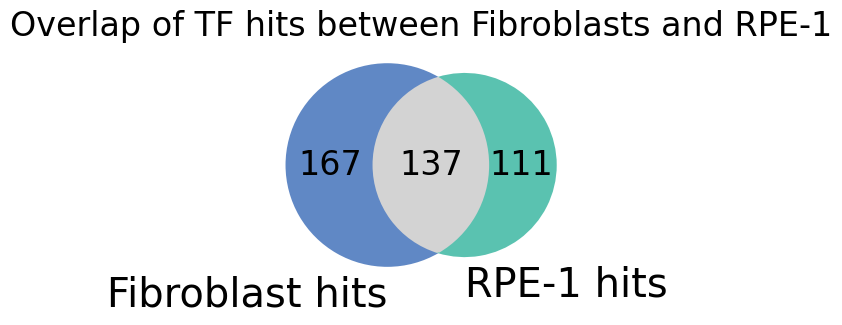

In [55]:
# --- Overlap Analysis: Venn Diagram ---

#Install matplotlib-venn if not already installed
#%pip install matplotlib-venn
from matplotlib_venn import venn2

# Suppose fibro_genes and rpe1_genes are Python lists of gene symbols
set_fibro = set(fibro_genes)
set_rpe1 = set(rpe1_genes)

# Create a new figure
plt.figure(figsize=(4,4))

# Create the Venn diagram
venn = venn2([set_fibro, set_rpe1],
             set_labels=('Fibroblast hits', 'RPE-1 hits'))

# Customize colors
venn.get_patch_by_id('10').set_color('#6088C5')    # Fibro-only
venn.get_patch_by_id('01').set_color('#5AC2B0') # RPE-1-only
venn.get_patch_by_id('11').set_color('#D3D3D3')     # Overlap

# Set alpha to 1.0 for full opacity
venn.get_patch_by_id('10').set_alpha(1.0)
venn.get_patch_by_id('01').set_alpha(1.0)
venn.get_patch_by_id('11').set_alpha(1.0)


plt.title('Overlap of TF hits between Fibroblasts and RPE-1')

plt.savefig('Overlap of TF hits between Fibroblasts and RPE-1.pdf')
#plt.show()


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

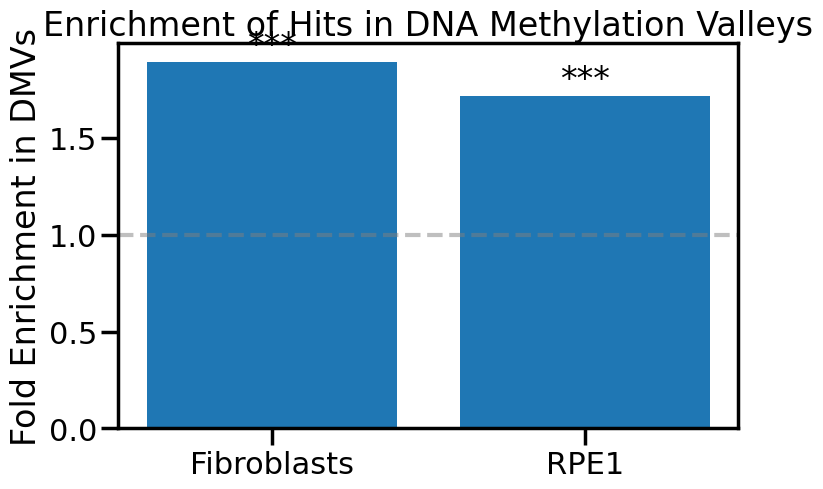


Detailed Statistics:

Fibroblasts:
Hits in DMVs: 46/304 (15.1%)
Background DMV rate: 8.0%
Fold enrichment: 1.89
Odds ratio: 2.56
P-value: 3.74e-06

RPE1:
Hits in DMVs: 34/248 (13.7%)
Background DMV rate: 8.0%
Fold enrichment: 1.71
Odds ratio: 2.09
P-value: 8.82e-04


In [56]:
def analyze_dmv_enrichment(hit_genes, all_genes, dmv_genes, cell_type_name):
    # Create contingency table
    hit_dmv = len(set(hit_genes) & set(dmv_genes))
    hit_non_dmv = len(set(hit_genes) - set(dmv_genes))
    non_hit_dmv = len(set(dmv_genes) - set(hit_genes))
    non_hit_non_dmv = len(set(all_genes) - set(hit_genes) - set(dmv_genes))
    
    # Construct contingency table
    contingency = np.array([[hit_dmv, hit_non_dmv],
                           [non_hit_dmv, non_hit_non_dmv]])
    
    # Perform Fisher's exact test
    odds_ratio, pvalue = stats.fisher_exact(contingency)
    
    # Calculate percentages
    hit_percent = (hit_dmv / len(set(hit_genes))) * 100
    background_percent = (len(set(dmv_genes)) / len(set(all_genes))) * 100
    
    return {
        'cell_type': cell_type_name,
        'hits_in_dmv': hit_dmv,
        'total_hits': len(set(hit_genes)),
        'percent_hits_in_dmv': hit_percent,
        'background_percent': background_percent,
        'odds_ratio': odds_ratio,
        'pvalue': pvalue,
        'fold_enrichment': hit_percent / background_percent
    }

# Analyze both cell types
fibro_results = analyze_dmv_enrichment(fibro_genes, all_tf_genes, dmv_tfs, 'Fibroblasts')
rpe1_results = analyze_dmv_enrichment(rpe1_genes, all_tf_genes, dmv_tfs, 'RPE1')

# Plot the results
fig, ax = plt.subplots(figsize=(8, 5))

# Data for plotting
cell_types = [fibro_results['cell_type'], rpe1_results['cell_type']]
enrichments = [fibro_results['fold_enrichment'], rpe1_results['fold_enrichment']]
pvalues = [fibro_results['pvalue'], rpe1_results['pvalue']]

# Create bar plot
bars = ax.bar(cell_types, enrichments)

# Add significance stars
for i, (bar, pval) in enumerate(zip(bars, pvalues)):
    height = bar.get_height()
    stars = '*' * sum([pval < cutoff for cutoff in [0.05, 0.01, 0.001]])
    if stars:
        ax.text(bar.get_x() + bar.get_width()/2, height,
                stars, ha='center', va='bottom')

# Customize plot
ax.axhline(y=1, color='gray', linestyle='--', alpha=0.5)  # Add reference line at 1
ax.set_ylabel('Fold Enrichment in DMVs')
ax.set_title('Enrichment of Hits in DNA Methylation Valleys')
ax.grid(False)

plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
for result in [fibro_results, rpe1_results]:
    print(f"\n{result['cell_type']}:")
    print(f"Hits in DMVs: {result['hits_in_dmv']}/{result['total_hits']} ({result['percent_hits_in_dmv']:.1f}%)")
    print(f"Background DMV rate: {result['background_percent']:.1f}%")
    print(f"Fold enrichment: {result['fold_enrichment']:.2f}")
    print(f"Odds ratio: {result['odds_ratio']:.2f}")
    print(f"P-value: {result['pvalue']:.2e}")

In [57]:
both_stats = analyze_dmv_enrichment(np.union1d(fibro_genes, rpe1_genes), all_tf_genes, dmv_tfs, 'Fibroblasts')

In [58]:
both_stats

{'cell_type': 'Fibroblasts',
 'hits_in_dmv': 61,
 'total_hits': 415,
 'percent_hits_in_dmv': 14.698795180722893,
 'background_percent': 7.995558023320378,
 'odds_ratio': 2.7196923286365804,
 'pvalue': 7.388079017104114e-08,
 'fold_enrichment': 1.8383701472556897}